<a href="https://colab.research.google.com/github/Talieh-m/Data_Science/blob/main/KNN_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Librairies
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

### ***Getting Dataset***

In [ ]:
df= pd.read_csv('Heart.csv')
#finding the number of rows and columns
df.shape

(303, 14)

### ***Data Preparation***

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#checking for null values
df.isnull().sum()
#the results show that the dataset does not have any null value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

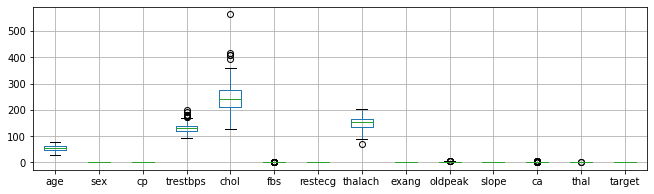

In [ ]:
#finding outliers
plt.figure(figsize=(11,3))
df.boxplot()

In [ ]:
for x in ["trestbps","chol",'fbs','thalach','oldpeak','ca','thal']:
  q75,q25=np.percentile(df.loc[:,x],[75,25])
  intr_qr= q75-q25
  max= q75+(1.5*intr_qr)
  min= q25-(1.5*intr_qr)
  df.loc[df[x]<min,x]=np.nan
  df.loc[df[x]>max,x]=np.nan
df.isnull().sum()
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## ***Exploration & Visualization***

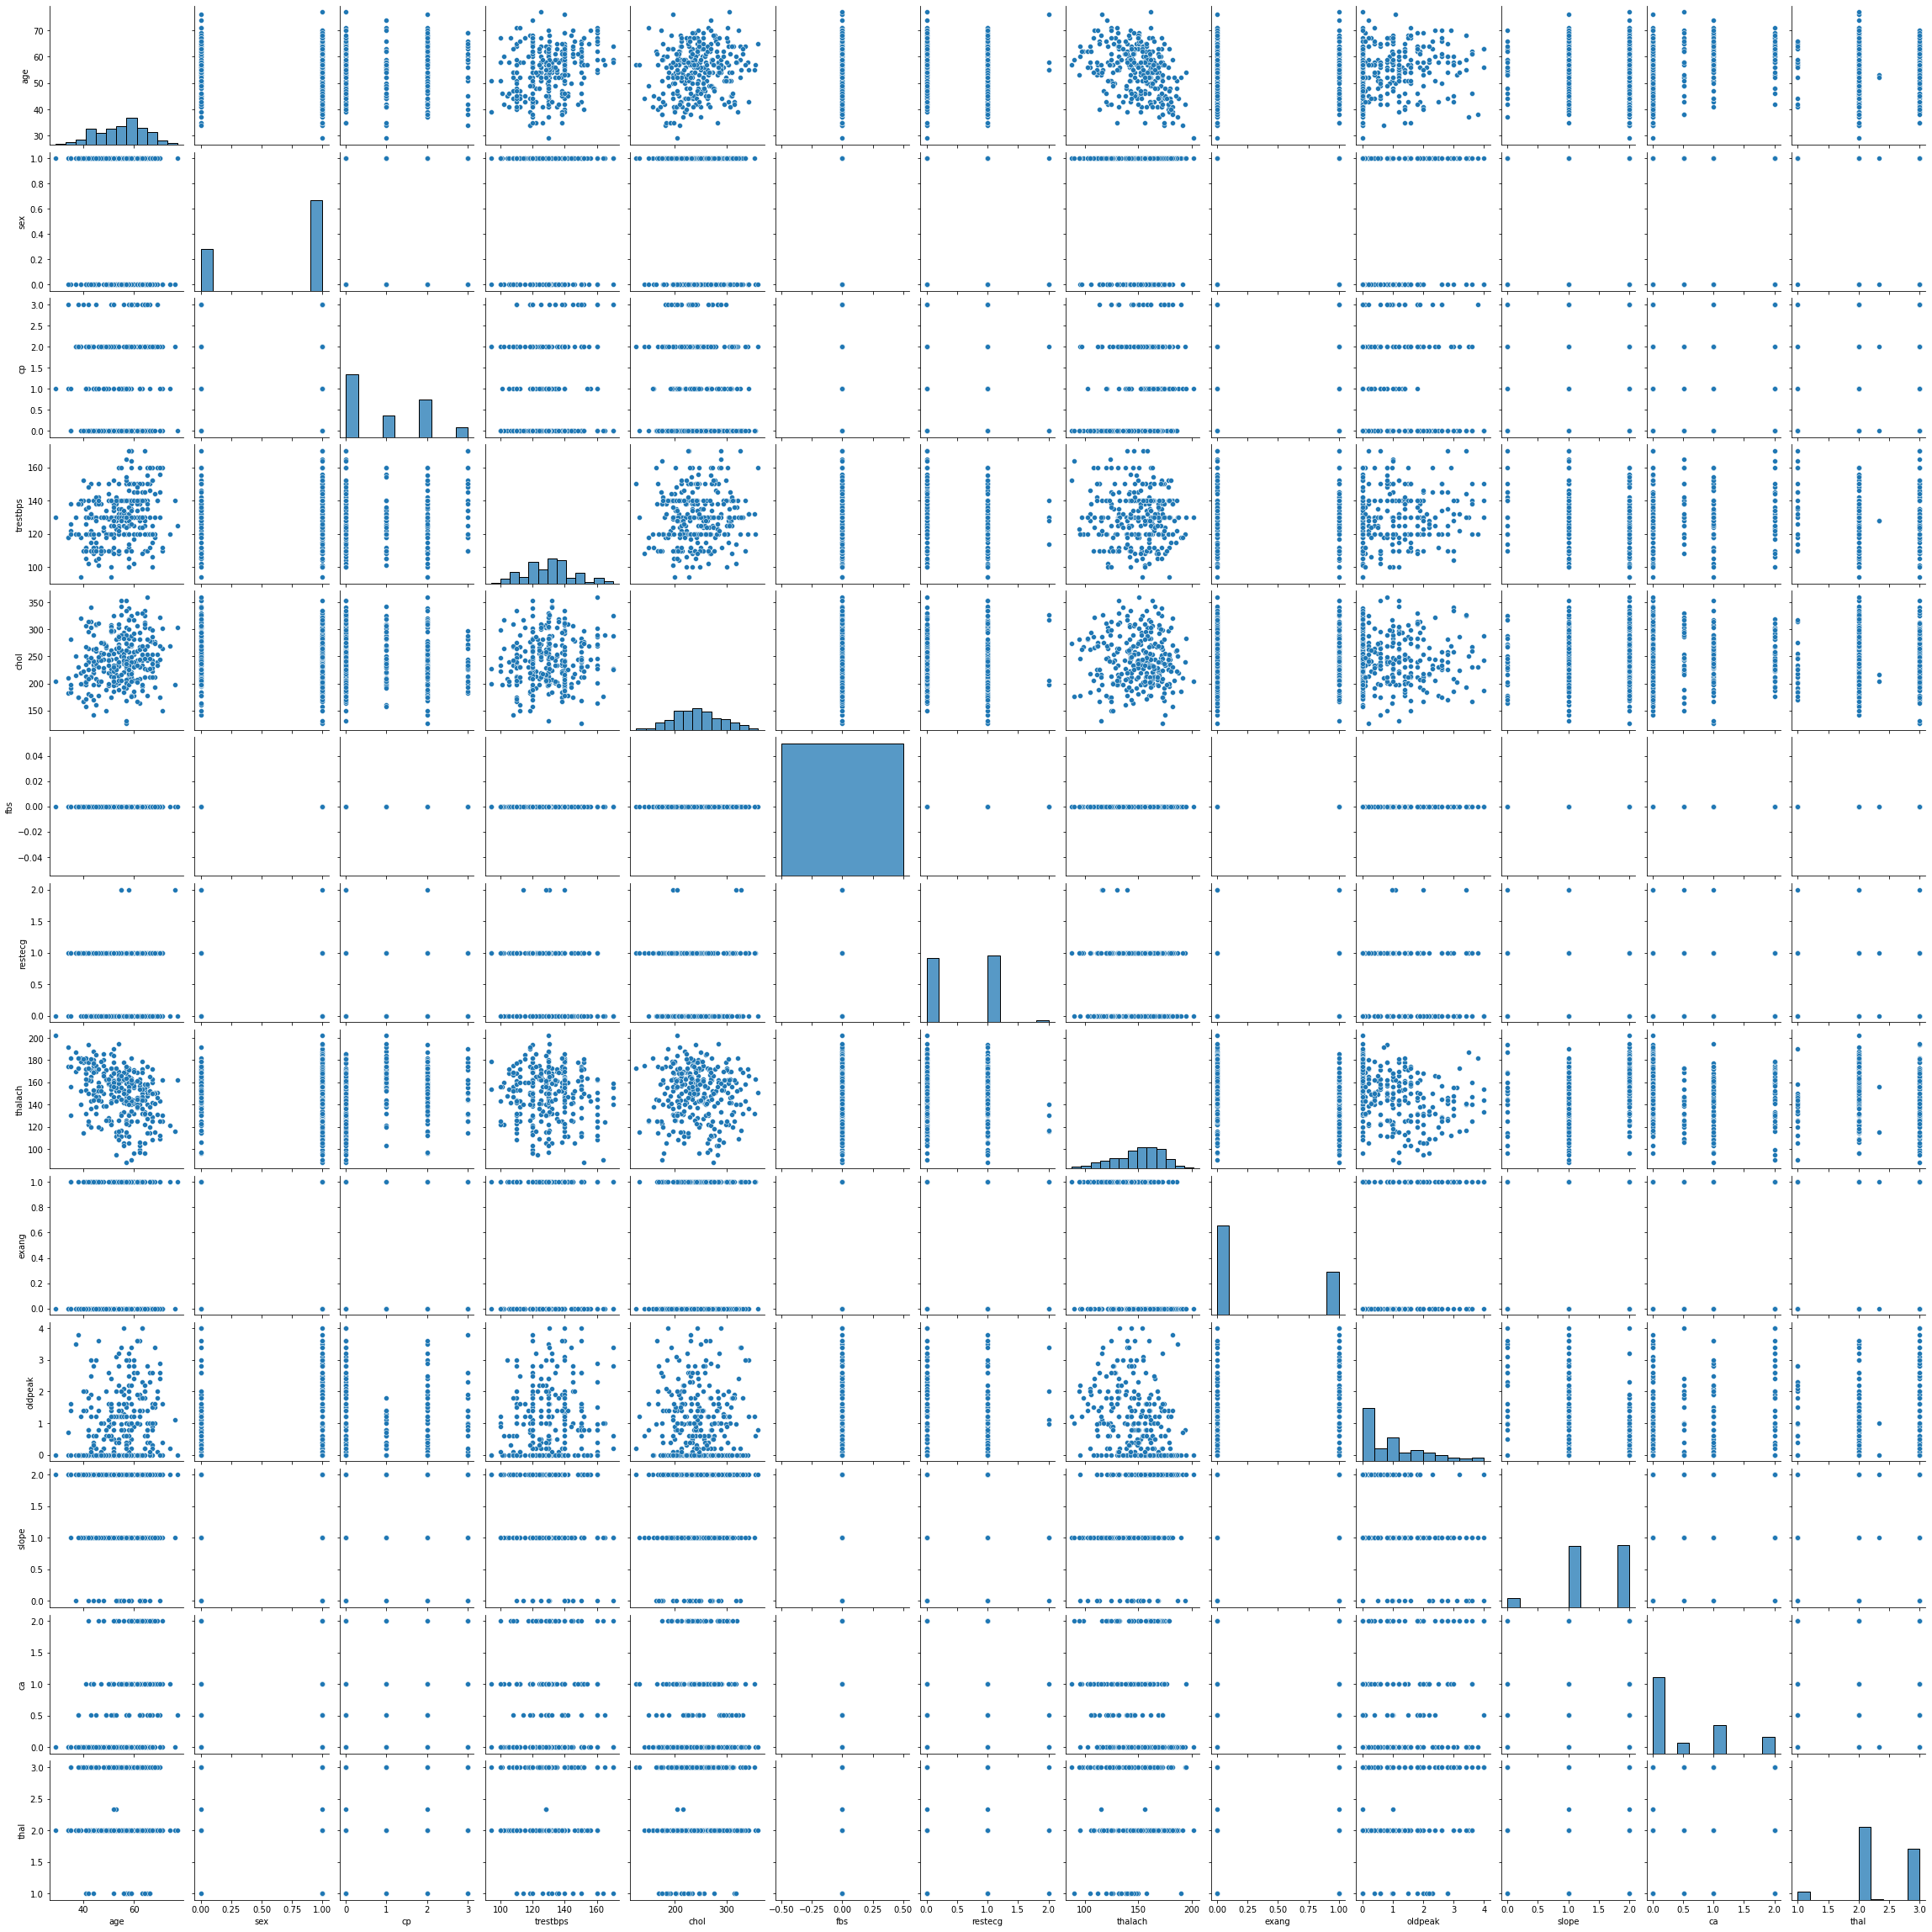

In [ ]:
sn.color_palette("hls", 8)
sn.pairplot(df , vars =['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])

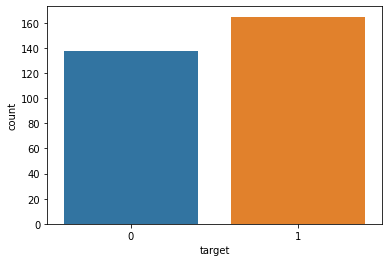

In [ ]:
#drawing a plot to visualize the balancing
sn.countplot(x='target',data=df)
#the result shows that the data is balanced

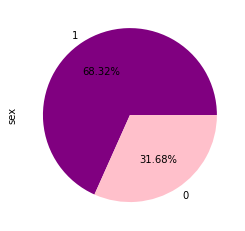

In [ ]:
df['sex'].value_counts().plot.pie( autopct = "%.2f%%", colors = ['purple', 'pink'] )


### ***Training the models***

In [ ]:
#defining dependent and independent variables
x=df.iloc[ : , :-1].values
y=df.iloc[ : ,-1].values
print(x)
print(y)
#defining train set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.2, random_state=0)
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


### ***RandomForestClassifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_R= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_R.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### ***Accuracy & Confusion Matrix***

[[23  5]
 [ 4 29]]
0.852
F1 scoreR: 0.8656716417910447


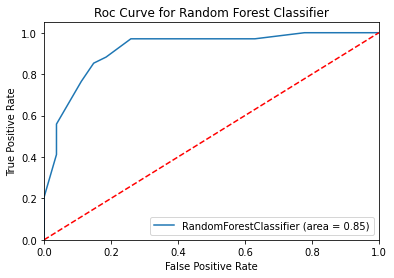

In [ ]:
y_pred_R= classifier_R.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve
print(confusion_matrix(y_pred_R, y_test))
accuracy_R=np.round(accuracy_score(y_pred_R, y_test), decimals=3)
print(accuracy_R)
f1_R=f1_score(y_test, y_pred_R)
print('F1 scoreR:',f1_R)
roc_auc_R = roc_auc_score(y_test, y_pred_R)
fpr, tpr, thresholds_R = roc_curve(y_test, classifier_R.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)'% roc_auc_R)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve for Random Forest Classifier')
plt.legend(loc="lower right") 
plt.show()

### ***K-NN Classifier***

In [ ]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_K = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_K.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### ***Accuracy & Confusion Matrix***

[[19  5]
 [ 8 29]]
0.787
F1 scoreK: 0.8169014084507041


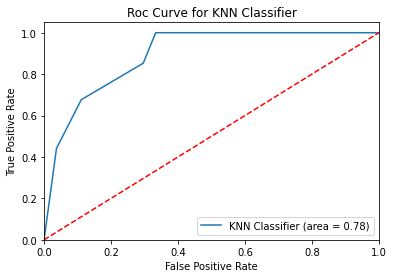

In [ ]:
y_pred_K= classifier_K.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_pred_K, y_test))
accuracy_K=np.round(accuracy_score(y_pred_K, y_test), decimals=3)
print(accuracy_K)
f1_K=f1_score(y_test, y_pred_K)
print('F1 scoreK:',f1_K)
roc_auc_K = roc_auc_score(y_test, y_pred_K)
fpr, tpr, thresholds_K = roc_curve(y_test, classifier_K.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Classifier (area = %0.2f)' % roc_auc_K)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Acc_score=[0.852,0.787]
f1_score=[0.866,0.817]
results=pd.DataFrame({'Models':['RandomForst', "KNN"],'Accuracy_score':[0.852,0.787],'f1_score':[0.866,0.817]}, columns=['Models','Accuracy_score','f1_score'])
results

,Models,Accuracy_score,f1_score
0,RandomForst,0.852,0.866
1,KNN,0.787,0.817
